In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

In [ ]:
G = nx.Graph()

In [ ]:
data_jobschange=pd.read_excel(r"flows_changes.xlsx")
data_jobschange["delta_flows"]=data_jobschange["beta_s2"]-data_jobschange["flows"]


In [ ]:
data_jobschange["beta_s2"]

0         12
1          4
2        179
3         18
4         16
        ... 
43940    234
43941    166
43942     29
43943     20
43944     70
Name: beta_s2, Length: 43945, dtype: int64

In [ ]:
G.add_nodes_from(data_jobschange["station_origin"])

In [ ]:
for index, row in data_jobschange.iterrows():
    G.add_edge(row["station_origin"],row["station_destination"],weight=row["jobs"])

In [ ]:
list(G.edges(data = True))[0]

('Abbey Road', 'Beckton', {'weight': 9})

In [ ]:
len(list(G.nodes(data = True)))

398

In [ ]:
G2 = nx.read_graphml('london.graph.xml')

In [ ]:
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G2.nodes[node]['coords'])

In [ ]:
list(G.nodes(data = True))[0]

('Abbey Road', {'coords': (539066.2631559198, 183400.73944767128)})

In [ ]:
#nx.set_edge_attributes(G,flows_dict,'weight')
betweenness_e_values=[]
betweenness_e_values=[(i[2]['weight']) for i in G.edges(data=True)]

bet_e_color=[(i[2]['weight']/100)*2 for i in G.edges(data=True)]
bet_e_width=[(i[2]['weight']/max(betweenness_e_values)*0.5) for i in G.edges(data=True)]
#print(bet_e_color)

# Plot graph


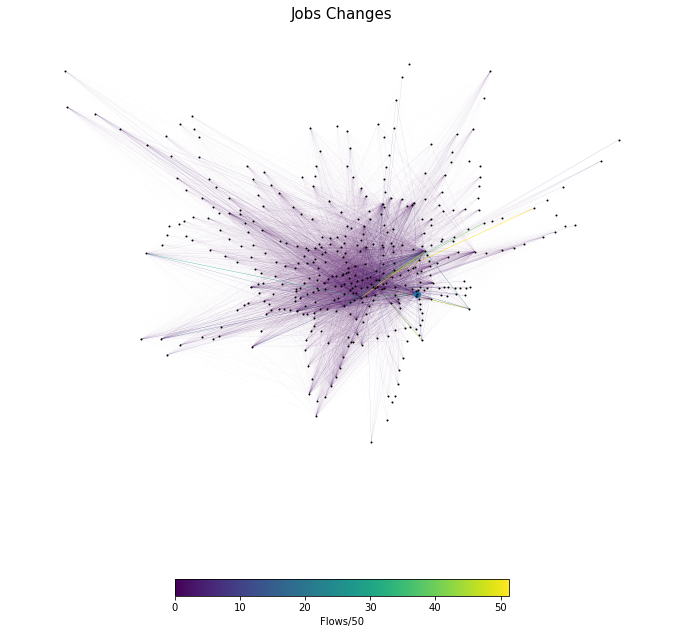

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
pos = nx.get_node_attributes(G, 'coords')
#pos=nx.spring_layout(X)
edg=nx.draw_networkx_edges(G, pos,edge_color=bet_e_color, width=bet_e_width)
pos = nx.get_node_attributes(G, 'coords')
nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)
plt.scatter(G.nodes["Canary Wharf"]['coords'][0],G.nodes["Canary Wharf"]['coords'][1])
plt.colorbar(edg,label="Flows/50",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Jobs Changes",fontsize=15)
plt.savefig("./jobs.png")
plt.show()
